# Model Training Notebook for Traffic Sign Recognition

In [20]:
import tensorflow as tf
import numpy as np
import gc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings 

# Suppress the specific Keras warning
warnings.filterwarnings("ignore", category=UserWarning, module='keras.src.trainers.data_adapters.py_dataset_adapter')

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Image settings
IMG_HEIGHT, IMG_WIDTH = 64, 64
BATCH_SIZE = 16  # balanced for memory + performance

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=False,  # Don't flip traffic signs
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\HP\Downloads\traffic_sign_recognition_jupyter\dataset\archive\Train",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    r"C:\Users\HP\Downloads\traffic_sign_recognition_jupyter\dataset\archive\Train",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=True
)
# Calculate steps correctly to avoid running out of data
steps_per_epoch = int(np.ceil(train_generator.samples / train_generator.batch_size))
validation_steps = int(np.ceil(val_generator.samples / val_generator.batch_size))

# Clear memory/session
gc.collect()
tf.keras.backend.clear_session()

Found 31368 images belonging to 43 classes.
Found 7841 images belonging to 43 classes.


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam

# Optimized CNN model
model = Sequential([
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),  # Preferred way to specify input shape

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(43, activation='softmax')  # 43 traffic sign classes
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,312,491 (5.01 MB)

 Trainable params: 1,312,043 (5.01 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
!pip install scipy

In [23]:
# Training
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=25,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/25
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 251s 125ms/step - accuracy: 0.2062 - loss: 3.1894 - val_accuracy: 0.4377 - val_loss: 1.7260 - learning_rate: 0.0010
Epoch 2/25
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 226s 115ms/step - accuracy: 0.5269 - loss: 1.4320 - val_accuracy: 0.6400 - val_loss: 1.3003 - learning_rate: 0.0010
Epoch 3/25
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 256s 131ms/step - accuracy: 0.7371 - loss: 0.8074 - val_accuracy: 0.7864 - val_loss: 0.6677 - learning_rate: 0.0010
Epoch 4/25
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 435s 222ms/step - accuracy: 0.8219 - loss: 0.5595 - val_accuracy: 0.8765 - val_loss: 0.4320 - learning_rate: 0.0010
Epoch 5/25
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 363s 185ms/step - accuracy: 0.8719 - loss: 0.4095 - val_accuracy: 0.8870 - val_loss: 0.3824 - learning_rate: 0.0010
Epoch 6/25
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 519s 265ms/step - accuracy: 0.8959 - loss: 0.3504 - val_accuracy: 0.8655 - val_loss: 0.5364 - learning_rate: 0.0010
Epoch 7/25
1961/1961 ━━━━━━━━━━━━━━━━━━━━ 372s 190ms

In [24]:
import json

# Save class indices as JSON
with open("class_indices.json", "w") as f:
    json.dump(train_generator.class_indices, f)

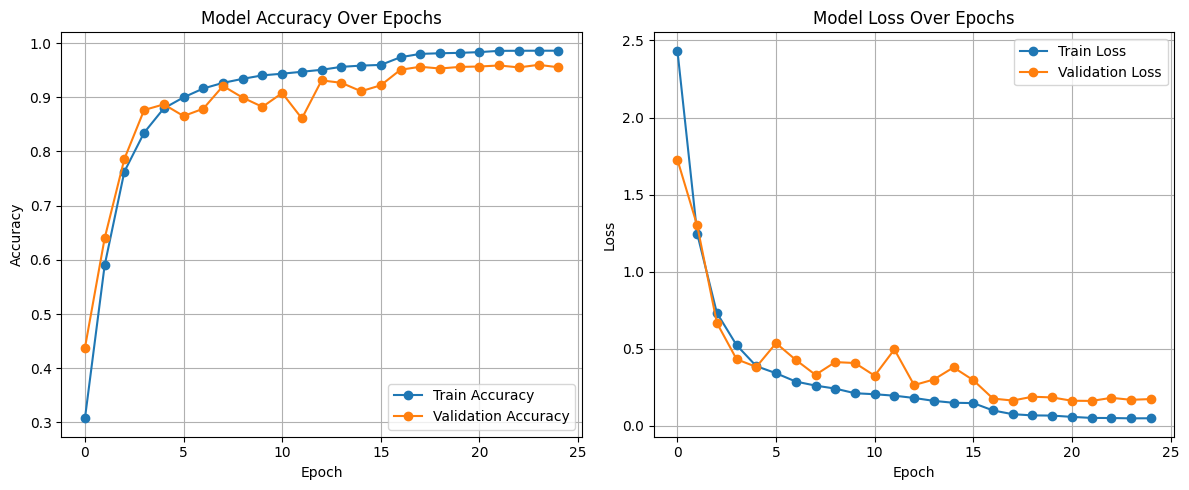

In [25]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [26]:
# Model Evaluation using validation data generator
val_loss, val_accuracy = model.evaluate(val_generator, verbose=2)

print(f"\n✅ Model Evaluation Completed!")
print(f"🔍 Validation Accuracy : {val_accuracy * 100:.2f}%")
print(f"📉 Validation Loss : {val_loss:.4f}")

491/491 - 39s - 80ms/step - accuracy: 0.9593 - loss: 0.1543

✅ Model Evaluation Completed!
🔍 Validation Accuracy : 95.93%
📉 Validation Loss : 0.1543


In [27]:
!pip install scikit-learn

In [28]:
!pip install seaborn

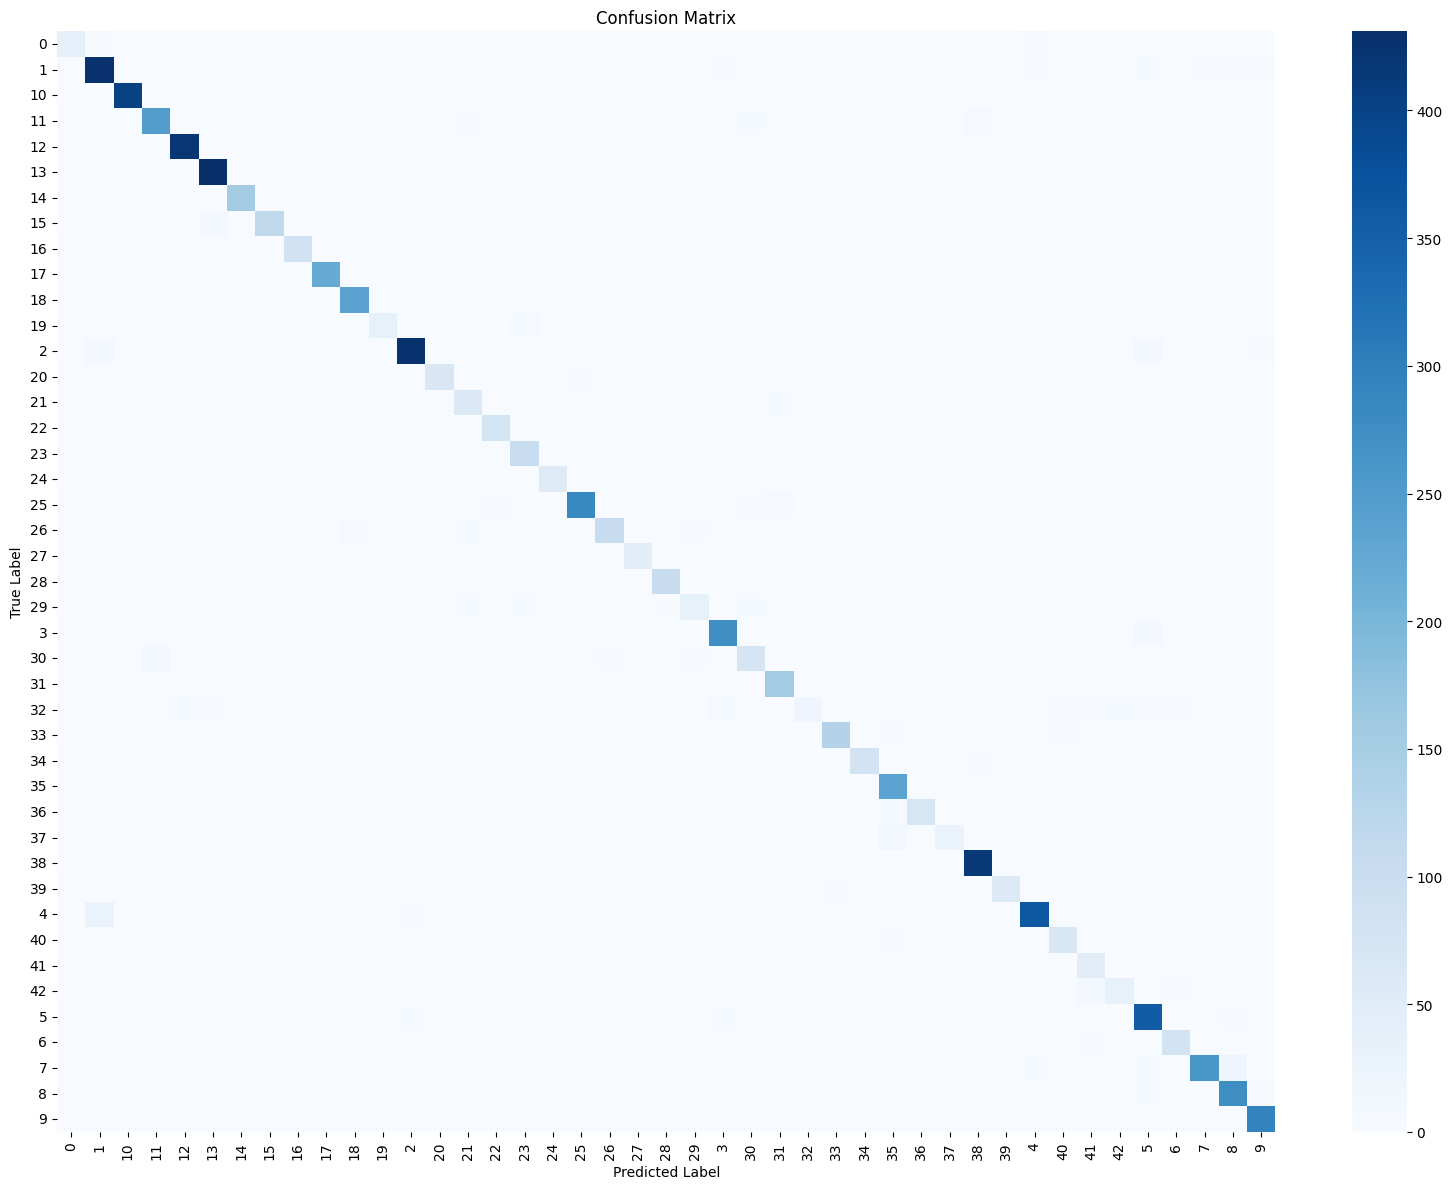

Classification Report:

              precision    recall  f1-score   support

         0.0      1.000     0.881     0.937        42
         1.0      0.909     0.964     0.936       444
         2.0      1.000     0.998     0.999       402
         3.0      0.954     0.939     0.947       264
         4.0      0.986     1.000     0.993       420
         5.0      0.971     0.998     0.984       432
         6.0      0.994     1.000     0.997       156
         7.0      0.991     0.913     0.950       126
         8.0      1.000     0.988     0.994        84
         9.0      1.000     1.000     1.000       222
        10.0      0.971     0.992     0.981       240
        11.0      0.972     0.833     0.897        42
        12.0      0.982     0.949     0.965       450
        13.0      0.971     0.931     0.950        72
        14.0      0.827     0.939     0.879        66
        15.0      0.963     1.000     0.981        78
        16.0      0.879     1.000     0.936       102
   

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Reset generator and initialize lists
y_true = []
y_pred = []

val_generator.reset()

for i in range(len(val_generator)):
    x_batch, y_batch = val_generator[i]
    
    y_true.extend(y_batch)  # Already label encoded
    
    y_probs = model.predict(x_batch, verbose=0)
    y_pred.extend(np.argmax(y_probs, axis=1))  # Get predicted class

# Convert to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(16, 12))
sns.heatmap(cm, cmap='Blues', 
            xticklabels=train_generator.class_indices.keys(), 
            yticklabels=train_generator.class_indices.keys(), 
            annot=False, fmt='d', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, digits=3))

In [30]:
# Save the model
model.save("traffic_sign_model.keras", include_optimizer=False)
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [31]:
from keras.models import load_model
# Load the model
model = load_model("traffic_sign_model.keras")
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


In [39]:
import json
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("traffic_sign_model.keras")

# Load class mapping
with open("class_indices.json", "r") as f:
    class_indices = json.load(f)

# Invert mapping: {0: '20', 1: '0', ..., 42: '42'}
label_map = {v: k for k, v in class_indices.items()}

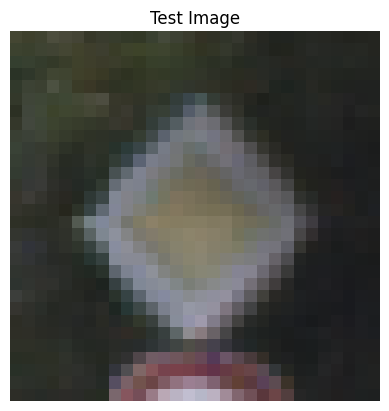

In [32]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
img_path = "C:\\Users\\HP\\Downloads\\traffic_sign_recognition_jupyter\\dataset\\archive\\Test\\00007.png"
img = image.load_img(img_path, target_size=(30, 30))  # Resize to your model's input shape
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Shape becomes (1, 30, 30, 3)
img_array /= 255.0  # Normalize if needed

# Show the image
plt.imshow(img)
plt.axis('off')
plt.title("Test Image")
plt.show()

In [33]:
!pip install tqdm

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,936,579 (15.02 MB)

 Trainable params: 1,312,043 (5.01 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2,624,088 (10.01 MB)

In [35]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Class names
class_names = list(train_generator.class_indices.keys())

# True label (manually known)
true_label = '14'  # 🔁 Replace this with the actual label of your test image

# Load and preprocess image
img_path = r"C:\Users\HP\Downloads\traffic_sign_recognition_jupyter\dataset\archive\Test\00111.png"  # 🔁 Replace this
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
confidence = predictions[0][predicted_class_index]
predicted_label = class_names[predicted_class_index]

# Result
print("\n🔍 Prediction Result")
print(f"📌 Predicted Label   : {predicted_label}")
print(f"✅ True Label        : {true_label}")
print(f"📈 Confidence        : {confidence * 100:.2f}%")

# Correctness check
if predicted_label == true_label:
    print("🎯 Result            : ✅ Correct Prediction")
else:
    print("🎯 Result            : ❌ Wrong Prediction")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step

🔍 Prediction Result
📌 Predicted Label   : 14
✅ True Label        : 14
📈 Confidence        : 100.00%
🎯 Result            : ✅ Correct Prediction


In [36]:
from tensorflow.keras.preprocessing import image
import numpy as np

class_names = list(train_generator.class_indices.keys())

# Load image from Google
img_path = r"C:\Users\HP\Downloads\traffic_sign_recognition_jupyter\dataset\test_images\WhatsApp Image 2025-07-25 at 14.47.24_4e49bab4.jpg"  # Replace with your image path
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
confidence = predictions[0][predicted_class_index]
predicted_label = class_names[predicted_class_index]

# 🔁 Manually assigned true label
true_label = "34"  # Replace with actual label name
result = "✅ Correct Prediction" if predicted_label == true_label else "❌ Wrong Prediction"

# Display
print("\n🔍 Prediction Result")
print(f"📌 Predicted Label   : {predicted_label}")
print(f"✅ True Label        : {true_label}")
print(f"📈 Confidence        : {confidence * 100:.2f}%")
print(f"🎯 Result            : {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step

🔍 Prediction Result
📌 Predicted Label   : 34
✅ True Label        : 34
📈 Confidence        : 99.95%
🎯 Result            : ✅ Correct Prediction


In [37]:
# Map original labels to class names
id_to_classname = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing for vehicles over 3.5 metric tons',
    11: 'Right-of-way at the next intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Vehicles over 3.5 metric tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve to the left',
    20: 'Dangerous curve to the right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End of all speed and passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End of no passing by vehicles over 3.5 metric tons'
}

# Adjust class_names to match your model's training label order
class_names = [
    id_to_classname[20],  # First in your training label is 20
    id_to_classname[0],
    id_to_classname[1],
    id_to_classname[2],
    id_to_classname[3],
    id_to_classname[4],
    id_to_classname[5],
    id_to_classname[6],
    id_to_classname[7],
    id_to_classname[8],
    id_to_classname[9],
    id_to_classname[10],
    id_to_classname[11],
    id_to_classname[12],
    id_to_classname[13],
    id_to_classname[14],
    id_to_classname[15],
    id_to_classname[16],
    id_to_classname[17],
    id_to_classname[18],
    id_to_classname[19],
    id_to_classname[21],
    id_to_classname[22],
    id_to_classname[23],
    id_to_classname[24],
    id_to_classname[25],
    id_to_classname[26],
    id_to_classname[27],
    id_to_classname[28],
    id_to_classname[29],
    id_to_classname[30],
    id_to_classname[31],
    id_to_classname[32],
    id_to_classname[33],
    id_to_classname[34],
    id_to_classname[35],
    id_to_classname[36],
    id_to_classname[37],
    id_to_classname[38],
    id_to_classname[39],
    id_to_classname[40],
    id_to_classname[41],
    id_to_classname[42]
]

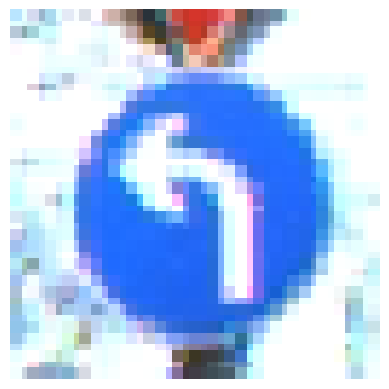

Predicted class index: 28
Class label: 34
Class name: Turn left ahead
Confidence: 100.00%


In [42]:
# 🔹 Step 1: Import required libraries
import json
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Dictionary mapping class label numbers to actual class names
class_names = {
    "0": "Speed Limit 20",
    "1": "Speed Limit 30",
    "2": "Speed Limit 50",
    "3": "Speed Limit 60",
    "4": "Speed Limit 70",
    "5": "Speed Limit 80",
    "6": "End of Speed Limit 80",
    "7": "Speed Limit 100",
    "8": "Speed Limit 120",
    "9": "No passing",
    "10": "No passing for vehicles over 3.5 metric tons",
    "11": "Right-of-way at the next intersection",
    "12": "Priority road",
    "13": "Yield",
    "14": "Stop",
    "15": "No vehicles",
    "16": "Vehicles over 3.5 metric tons prohibited",
    "17": "No entry",
    "18": "General caution",
    "19": "Dangerous curve to the left",
    "20": "Dangerous curve to the right",
    "21": "Double curve",
    "22": "Bumpy road",
    "23": "Slippery road",
    "24": "Road narrows on the right",
    "25": "Road work",
    "26": "Traffic signals",
    "27": "Pedestrians",
    "28": "Children crossing",
    "29": "Bicycles crossing",
    "30": "Beware of ice/snow",
    "31": "Wild animals crossing",
    "32": "End of all speed and passing limits",
    "33": "Turn right ahead",
    "34": "Turn left ahead",
    "35": "Ahead only",
    "36": "Go straight or right",
    "37": "Go straight or left",
    "38": "Keep right",
    "39": "Keep left",
    "40": "Roundabout mandatory",
    "41": "End of no passing",
    "42": "End of no passing by vehicles over 3.5 metric tons"
}

# 🔹 Step 2: Load the trained model
model = load_model("traffic_sign_model.keras")

# 🔹 Step 3: Load the class index mapping
with open("class_indices.json", "r") as f:
    class_indices = json.load(f)

# 🔹 Step 4: Invert the mapping so predicted index gives class label
label_map = {v: k for k, v in class_indices.items()}
# (optional) Convert keys to int if needed
label_map = {int(v): k for k, v in class_indices.items()}

# 🔹 Step 5: Load and preprocess the image
img_path = r"C:\Users\HP\Downloads\traffic_sign_recognition_jupyter\dataset\archive\Test\00337.png"  # 🔁 Replace with your image path
img = image.load_img(img_path, target_size=(64, 64))  # your input size

plt.imshow(img)
plt.axis('off')
plt.show()

img_array = image.img_to_array(img)
img_array = img_array / 255.0  # normalize if needed
img_array = np.expand_dims(img_array, axis=0)  # add batch dimension

# 🔹 Step 7: Get class label from index
predicted_label = label_map[predicted_index]  # gives class id like "14"

# 🔹 Step 8: Convert to class name
predicted_class_name = class_names.get(predicted_label, "Unknown Sign")

# 🔹 Step 9: Display result
print(f"Predicted class index: {predicted_index}")
print(f"Class label: {predicted_label}")
print(f"Class name: {predicted_class_name}")
print(f"Confidence: {confidence * 100:.2f}%")

In [46]:
print(class_indices)

{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '5': 38, '6': 39, '7': 40, '8': 41, '9': 42}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


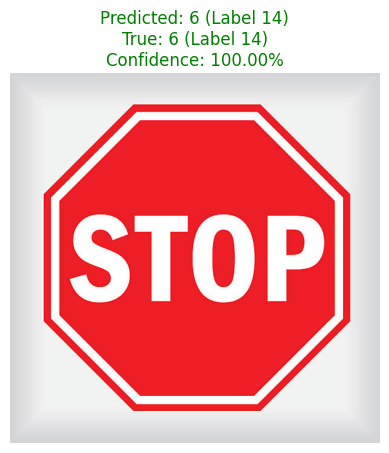

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load your trained model
model = load_model("traffic_sign_model.keras")  # Replace with your model file path

# Manually define the class mapping from class_indices
# Since class_indices gives {'0': 0, '1': 1, ..., '42': 42}, we reverse it:
class_indices = {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6,
                 '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13,
                 '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20,
                 '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27,
                 '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34,
                 '40': 35, '41': 36, '42': 37, '5': 38, '6': 39, '7': 40, '8': 41, '9': 42}

# Reverse the dictionary to map index → label
idx_to_label = {v: k for k, v in class_indices.items()}

# Update this path to the image you want to test
image_path = r"C:\Users\HP\Downloads\traffic_sign_recognition_jupyter\dataset\test_images\WhatsApp Image 2025-07-25 at 13.08.43_83285e14.jpg"
true_label = 14  # Example: actual label/class index of the image

# Load and preprocess the image
img = load_img(image_path, target_size=(64, 64))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Predict
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions[0])
confidence = predictions[0][predicted_index] * 100

# Get class names from indices
predicted_label = idx_to_label[predicted_index]
true_label_str = str(true_label)
true_index = class_indices[true_label_str]

# Determine color
if predicted_index == true_index:
    color = "green"
else:
    color = "red"

# Plot the image with prediction info
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Predicted: {predicted_index} (Label {predicted_label})\n"
          f"True: {true_index} (Label {true_label_str})\n"
          f"Confidence: {confidence:.2f}%",
          color=color, fontsize=12)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


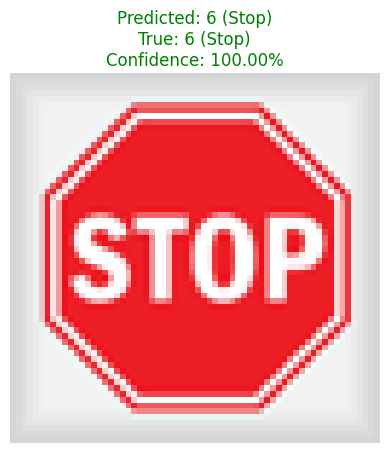

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import os
from PIL import Image
import matplotlib.patches as patches

# === 1. Load your model ===
model = load_model('traffic_sign_model.keras')

# === 2. Your class_indices ===
class_indices = {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9,
                 '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18,
                 '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27,
                 '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36,
                 '42': 37, '5': 38, '6': 39, '7': 40, '8': 41, '9': 42}

# === 3. Reverse the class_indices to get mapping index -> label ===
index_to_label = {v: k for k, v in class_indices.items()}

# === 4. (Optional) Human-readable class names ===
label_to_classname = {
    '0': 'Speed limit (20km/h)', '1': 'Speed limit (30km/h)', '2': 'Speed limit (50km/h)',
    '3': 'Speed limit (60km/h)', '4': 'Speed limit (70km/h)', '5': 'Speed limit (80km/h)',
    '6': 'End of speed limit (80km/h)', '7': 'Speed limit (100km/h)', '8': 'Speed limit (120km/h)',
    '9': 'No passing', '10': 'No passing for vehicles over 3.5 metric tons', '11': 'Right-of-way at the next intersection',
    '12': 'Priority road', '13': 'Yield', '14': 'Stop', '15': 'No vehicles',
    '16': 'Vehicles over 3.5 metric tons prohibited', '17': 'No entry', '18': 'General caution',
    '19': 'Dangerous curve to the left', '20': 'Dangerous curve to the right',
    '21': 'Double curve', '22': 'Bumpy road', '23': 'Slippery road', '24': 'Road narrows on the right',
    '25': 'Road work', '26': 'Traffic signals', '27': 'Pedestrians', '28': 'Children crossing',
    '29': 'Bicycles crossing', '30': 'Beware of ice/snow', '31': 'Wild animals crossing',
    '32': 'End of all speed and passing limits', '33': 'Turn right ahead', '34': 'Turn left ahead',
    '35': 'Ahead only', '36': 'Go straight or right', '37': 'Go straight or left',
    '38': 'Keep right', '39': 'Keep left', '40': 'Roundabout mandatory',
    '41': 'End of no passing', '42': 'End of no passing by vehicles over 3.5 metric tons'
}

# === 5. Load and preprocess your image ===
img_path = r"C:\Users\HP\Downloads\traffic_sign_recognition_jupyter\dataset\test_images\WhatsApp Image 2025-07-25 at 13.08.43_83285e14.jpg"
img = Image.open(img_path).resize((64, 64))
img_array = np.array(img) / 255.0
img_array = img_array.reshape((1, 64, 64, 3))

# === 6. Predict ===
pred_probs = model.predict(img_array)
pred_index = np.argmax(pred_probs)
true_label_index = 6  # Example: Replace with your ground truth label index

# === 7. Get class labels and class names ===
pred_label = index_to_label[pred_index]
true_label = index_to_label[true_label_index]

pred_class = label_to_classname.get(pred_label, f"Class {pred_label}")
true_class = label_to_classname.get(true_label, f"Class {true_label}")

# === 8. Determine correctness ===
is_correct = (pred_label == true_label)
color = 'green' if is_correct else 'red'

# === 9. Plot with colored text ===
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {pred_index} ({pred_class})\n"
          f"True: {true_label_index} ({true_class})\n"
          f"Confidence: {np.max(pred_probs) * 100:.2f}%",
          color=color)
plt.show()

In [55]:
!pip install opencv-python tensorflow